In [6]:
# importing our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('stackoverflow_full.csv',index_col=0)

In [5]:
df.head()

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [27]:
# drop the "Employment column"
del df['Employment']

## EDA

In [21]:
# select a color for our plots
color = sns.color_palette()[0]

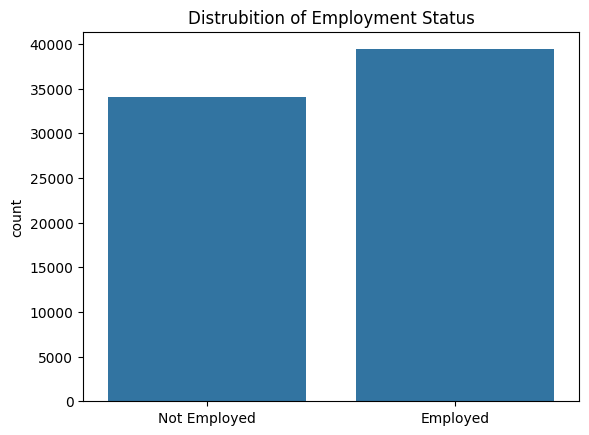

In [26]:
#view the distribution of our target variable
sns.countplot(x=df['Employed'], color=color)
plt.xticks(ticks=(0,1),labels=('Not Employed', 'Employed'))
plt.xlabel(None)
plt.title('Distrubition of Employment Status');

We have a fairly balanced dataset with 35,000 unemployed applicants and 40,000 employed ones.

In [33]:
# view the correlation between numeric features and our target variable
df.corr(numeric_only=True)['Employed']

YearsCode        -0.003756
YearsCodePro      0.002886
PreviousSalary    0.000379
ComputerSkills    0.585545
Employed          1.000000
Name: Employed, dtype: float64

We can see from the correlation plot that "Computer skills" has the highest correlation with the "Employed" column among the numeric features. This positive correlation value of approximately 0.586 suggests that as the level of computer skills increases, the likelihood of being employed also increases. However, it's important to note that correlation does not imply causation, so further analysis or additional data may be needed to understand the underlying factors contributing to this relationship.

Additionally, the other numeric features, such as "YearsCode" and "YearsCodePro," exhibit very weak correlations (close to zero) with "Employed," indicating that they have minimal linear relationships with employment status.

In [36]:
df['ComputerSkills'].nunique()

73

In [47]:
# view the distribution of our computer skills column
px.histogram(data_frame=df, x='ComputerSkills',nbins=20,color='Employed', title='Distribution of Computer Skills', 
             labels=['Not Employed', 'Employed'])

The plot above illustrates the disparity in computer skills distribution between employed and unemployed applicants:

- Employed applicants predominantly possess computer skills in the range of 10 to 19, with a notable presence of outliers showcasing exceptional skills, surpassing 60 and even exceeding 100.

- In contrast, unemployed applicants tend to exhibit computer skills within the range of 0 to 9. Only a small fraction of them possess skills falling between 20 and 29.

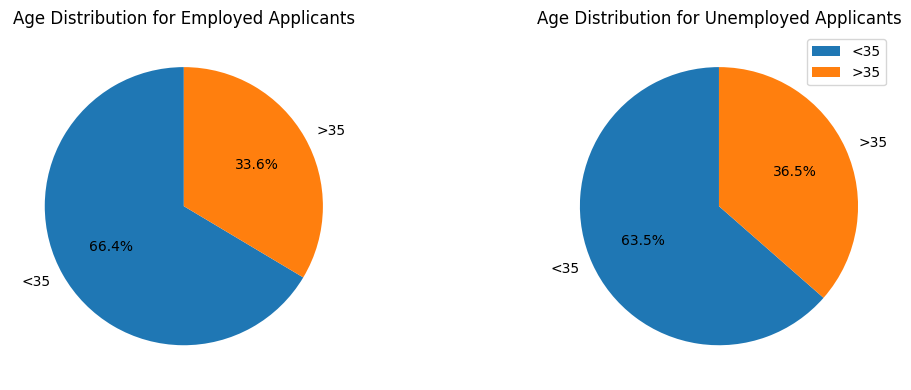

In [61]:
plt.figure(figsize=(12, 4))
# Pie plot for employed applicants
plt.subplot(1, 2, 1)
employed_counts = df[df['Employed'] == 1]['Age'].value_counts()
plt.pie(employed_counts, labels=employed_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution for Employed Applicants')

# Pie plot for unemployed applicants
plt.subplot(1, 2, 2)
unemployed_counts = df[df['Employed'] == 0]['Age'].value_counts()
plt.pie(unemployed_counts, labels=unemployed_counts.index, autopct='%1.1f%%', startangle=90)
plt.legend()
plt.title('Age Distribution for Unemployed Applicants')

plt.tight_layout()
plt.show()

We can observe from the pie plots that the employment ratios within both age ranges are quite similar,33% and 36%. This suggests that the distribution of employment status does not significantly vary between the two age groups, indicating a relatively balanced distribution of employment among different age brackets.

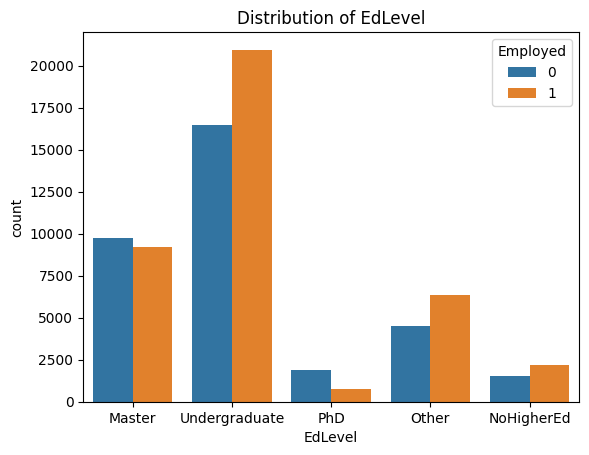

In [74]:
# view the distribution of EdLevel
sns.countplot(data=df,x='EdLevel', hue='Employed')
plt.title('Distribution of EdLevel');

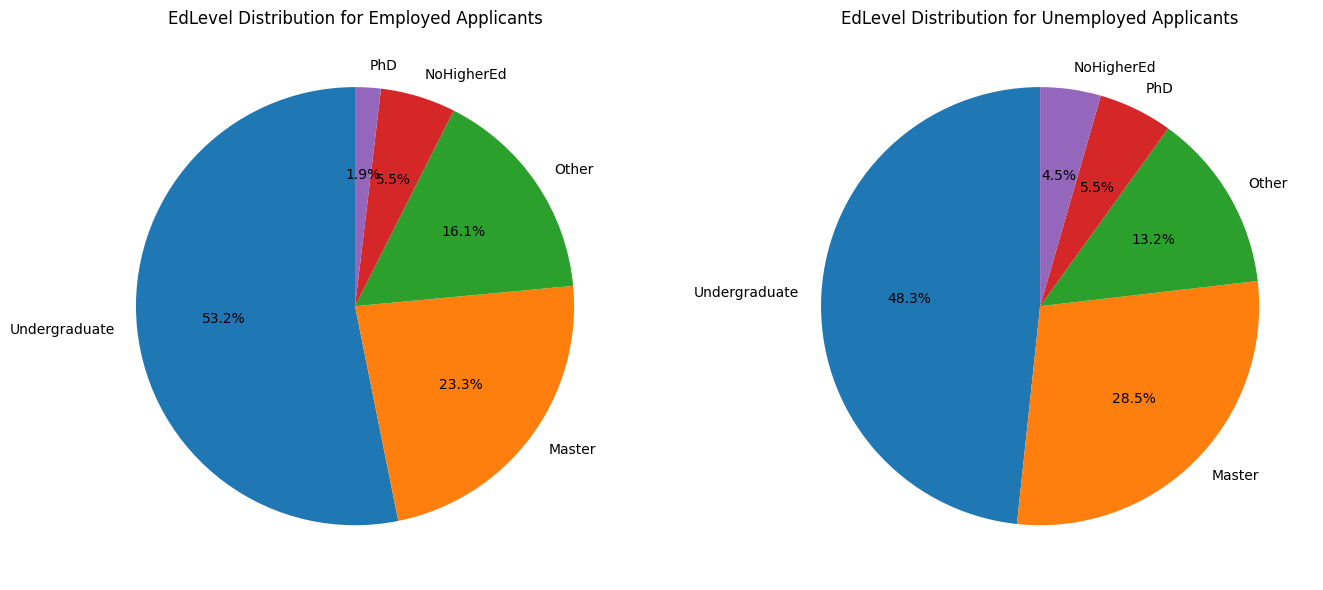

In [72]:
plt.figure(figsize=(14, 6))
# Pie plot for employed applicants
plt.subplot(1, 2, 1)
employed_counts = df[df['Employed'] == 1]['EdLevel'].value_counts()
plt.pie(employed_counts, labels=employed_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('EdLevel Distribution for Employed Applicants')

# Pie plot for unemployed applicants
plt.subplot(1, 2, 2)
unemployed_counts = df[df['Employed'] == 0]['EdLevel'].value_counts()
plt.pie(unemployed_counts, labels=unemployed_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('EdLevel Distribution for Unemployed Applicants')

plt.tight_layout()
plt.show()